## 지역별 의료인 수 및 인구 천명당 의사수를 비교 분석 (2019년도)
참고자료 : OECD Health Statistics 2019(요약본).pdf
- 인구 천명당 의사수 분석 : 의사수 / 주민등록인구수 * 1000
- 의사 수 : 한의사 값을 제외
- 간호사 수 : 간호조무사를 제외한 값 
    - 간호조무사 포함 값은 평균  7.9명 
    - OECD 평균 = 9.4명 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

<ipython-input-1-b2c366fd8878>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [15]:
df = pd.read_csv("의료종사자수_통합.csv")

In [17]:
df.columns

Index(['행정구역별', '계', '의사', '간호사', '주민등록인구', '인구 천명당 의사수', '인구 천명당 간호사수',
       '인구 천명당 의료인수'],
      dtype='object')

In [18]:
df

,행정구역별,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수
0,계,460995,105628,215293,51849861,2.0,4.2,8.9
1,서울,114861,30359,52727,9729107,3.1,5.4,11.8
2,부산,37028,8008,18514,3413841,2.3,5.4,10.8
3,대구,26087,5908,12557,2438031,2.4,5.2,10.7
4,인천,24081,5071,11639,2957026,1.7,3.9,8.1
5,광주,17835,3658,8949,1456468,2.5,6.1,12.2
6,대전,15746,3726,7153,1474870,2.5,4.8,10.7
7,울산,8950,1754,4612,1148019,1.5,4.0,7.8
8,세종,1109,302,220,340575,0.9,0.6,3.3
9,경기,91723,21210,39694,13239666,1.6,3.0,6.9


* 천명당 의사수 데이터 : 전국(데이터)보다 낮은 지역 
    - 세종시, 경북, 울산, 충남, 경기 
    - Top 3 지역은 상급종합병원이 없음 

In [47]:
df_doc_less= df[df['인구 천명당 의사수'] < 2.0]
df_doc_less.sort_values(by='인구 천명당 의사수').head()

,행정구역별,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수
8,세종,1109,302,220,340575,0.9,0.6,3.3
15,경북,19165,3662,9577,2665836,1.4,3.6,7.2
7,울산,8950,1754,4612,1148019,1.5,4.0,7.8
12,충남,14122,3198,5940,2123709,1.5,2.8,6.6
9,경기,91723,21210,39694,13239666,1.6,3.0,6.9


In [48]:
df_doc_less.set_index('행정구역별', inplace=True)

<AxesSubplot:ylabel='행정구역별'>

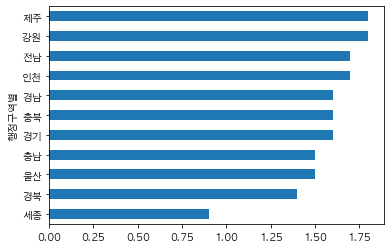

In [49]:
df_doc_less['인구 천명당 의사수'].sort_values().plot.barh()

* 천명당 간호사 수 데이터 : 전국(데이터)보다 낮은 지역
    - 세종시, 충남, 경기, 충북 ,경북 

In [51]:
df_n_less= df[df['인구 천명당 간호사수'] < 4.2]
df_n_less.sort_values(by='인구 천명당 간호사수').head()

,행정구역별,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수
8,세종,1109,302,220,340575,0.9,0.6,3.3
12,충남,14122,3198,5940,2123709,1.5,2.8,6.6
9,경기,91723,21210,39694,13239666,1.6,3.0,6.9
11,충북,11258,2529,4767,1600007,1.6,3.0,7.0
15,경북,19165,3662,9577,2665836,1.4,3.6,7.2


<AxesSubplot:ylabel='행정구역별'>

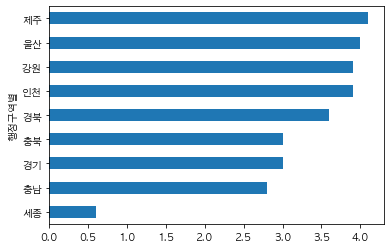

In [52]:
df_n_less.set_index('행정구역별', inplace=True)
df_n_less['인구 천명당 간호사수'].sort_values().plot.barh()

* 천명당 간호사 수 데이터 : 전국(데이터)보다 낮은 지역
    - 세종시

In [53]:
df_less= df[df['인구 천명당 의료인수'] < 4.2]
df_less.sort_values(by='인구 천명당 의료인수')

,행정구역별,계,의사,간호사,주민등록인구,인구 천명당 의사수,인구 천명당 간호사수,인구 천명당 의료인수
8,세종,1109,302,220,340575,0.9,0.6,3.3


- OECD 기준보다 의료인 수가 부족해보임 
- 상급종합병원, 종합병원의 숫자와 의료인 수에 대한 관계 파악이 필요해보임 
